In [3]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools


In [4]:
drug_smiles = {
    "Futibatinib": "COC1=CC(=CC(=C1)C#CC2=NN(C3=NC=NC(=C23)N)[C@H]4CCN(C4)C(=O)C=C)OC",
    "Infigratinib": "CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=O)NC4=C(C(=CC(=C4Cl)OC)OC)Cl",
    "Pemigatinib": "CCN1C2=C3C=C(NC3=NC=C2CN(C1=O)C4=C(C(=CC(=C4F)OC)OC)F)CN5CCOCC5",
    "Paclitaxel": "CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C",
    "Erdafitinib": "CC(C)NCCN(C1=CC2=NC(=CN=C2C=C1)C3=CN(N=C3)C)C4=CC(=CC(=C4)OC)OC",
    "Diethylstilbestrol": "CC/C(=C(/CC)\\C1=CC=C(C=C1)O)/C2=CC=C(C=C2)O",
    "Histamine": "C1=C(NC=N1)CCN",
    "Imatinib": "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5",
    "Progesterone": "CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC(=O)CC[C@]34C)C",
    "Cysteine": "C([C@@H](C(=O)O)N)S",
    "Thalidomide": "C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O",
    "Melphalan": "C1=CC(=CC=C1C[C@@H](C(=O)O)N)N(CCCl)CCCl",
    "Dexamethasone": "C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@@]4([C@]3([C@H](C[C@@]2([C@]1(C(=O)CO)O)C)O)F)C",
    "Nintedanib": "CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)N=C(C3=CC=CC=C3)C4=C(NC5=C4C=CC(=C5)C(=O)OC)O",
}


label_list = [ i for i in list(drug_smiles.keys())]


mols_list = [Chem.MolFromSmiles(smile) for smile in list(drug_smiles.values())]


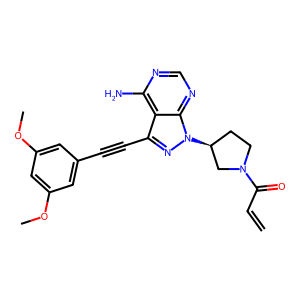

In [5]:

Draw.MolToImage(mols_list[0])


# Draw.MolToFile(mols_list[0],'Futibatinib.png',size=(300, 300))


In [9]:
# Here only five descriptors are taken for calculations we can take what is needed
descriptor_names = [descriptor_name[0] for descriptor_name in Descriptors._descList[:5]]
descriptor_calculation = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
rdkit_descriptors = [descriptor_calculation.CalcDescriptors(mol_temp) for mol_temp in mols_list]
df = pd.DataFrame(rdkit_descriptors, columns=descriptor_names, index=label_list)
df['smiles'] = list(drug_smiles.values())
PandasTools.AddMoleculeColumnToFrame(df, molCol='IMAGE', smilesCol='smiles')
# PandasTools.SaveXlsxFromFrame(df, 'Chemical_descriptors.xlsx', 
#                               molCol='IMAGE', 
#                               size=(150, 150)
#                               )

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,smiles,IMAGE
Futibatinib,11.967577,11.967577,0.034108,-0.097140,0.508173,COC1=CC(=CC(=C1)C#CC2=NN(C3=NC=NC(=C23)N)[C@H]...,
Infigratinib,13.040975,13.040975,0.153503,-0.512704,0.380779,CCN1CCN(CC1)C2=CC=C(C=C2)NC3=CC(=NC=N3)N(C)C(=...,
Pemigatinib,15.226729,15.226729,0.053824,-0.970248,0.571636,CCN1C2=C3C=C(NC3=NC=C2CN(C1=O)C4=C(C(=CC(=C4F)...,
Paclitaxel,15.483795,15.483795,0.002885,-2.390958,0.129786,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,
Erdafitinib,5.510488,5.510488,0.399265,0.399265,0.413156,CC(C)NCCN(C1=CC2=NC(=CN=C2C=C1)C3=CN(N=C3)C)C4...,
Diethylstilbestrol,9.410680,9.410680,0.284153,0.284153,0.779698,CC/C(=C(/CC)\C1=CC=C(C=C1)O)/C2=CC=C(C=C2)O,
Histamine,5.271944,5.271944,0.682731,0.682731,0.560082,C1=C(NC=N1)CCN,
Imatinib,12.929507,12.929507,0.142801,-0.142801,0.389416,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,
Progesterone,12.146718,12.146718,0.245103,0.245103,0.701319,CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4...,
Cysteine,9.756435,9.756435,0.189815,-1.004630,0.424382,C([C@@H](C(=O)O)N)S,

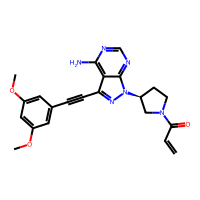
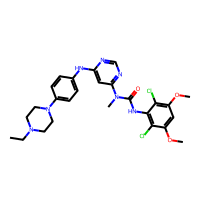
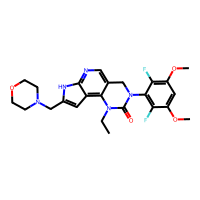
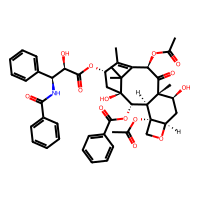
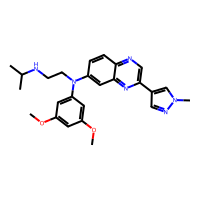
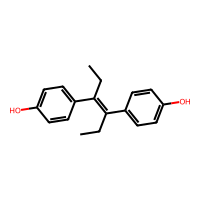
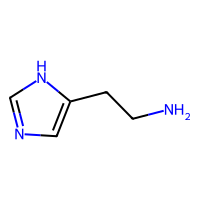
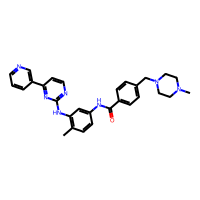
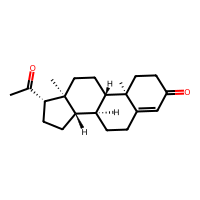
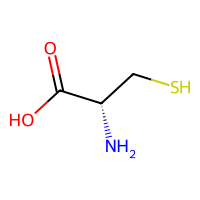
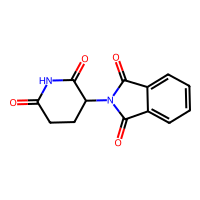
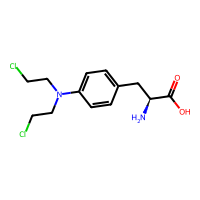
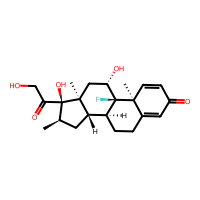
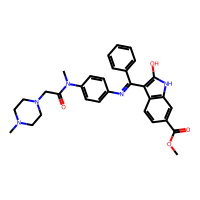

In [10]:
df